# Análisis espacial 

## Introducción a GeoPandas

Los datos geográficos o espaciales suelen agruparse en dos grandes tipos: `ráster` y `vectorial`. 

Mientras los primeros se caracterizan por disponer la información en una grilla codificada en pixeles con valores numéricos (comunmente utilizados para el procesaimiento de imágnes satelitales), los últimos se distinguen por la presencia de un conjunto de objetos geográficos de distinto tipo. Comunmente, **líneas, puntos y polígonos**. En [este modulo](https://github.com/PyMap/AUPY/tree/master/Modulo%201) dejamos un repaso de los objetos geográficos principales, los atributos y métodos disponibles. 

GeoPandas es una de las librerías de Python más utilizadas para el procesamiento de datos vectoriales. El tema que nos ocupará en esta clase. 

Una de las claves de esta librería, y por la que se ha vuelto tan popular, es que concentra una amplia gama de funcionalidades. Permite trabajar con esquemas tabulares (Pandas), leer archivos espaciales (Fiona), manipular objetos geográficos (Shapely) y visualizarlos (Matplotlib y Descartes).


# Geodataframes: como en `pandas` pero `geo`

Los dataframes en geopandas no son otra cosa que una base de datos. Como las que venimos manipulando en pandas. Ahora bien, estas se distinguen por la presencia de un atributo que los dataframes comunes no cuentan: una `geometría`. Esta define tanto el tipo de objeto como las operaciones espaciales soportadas. 

Para cargar un geodataframe contamos con distintas alternativas. Podríamos leer un archivo de tipo `shp` como así también interpretar una geometría desde un cuerpo de texto o bien a partir de coordenadas geogŕaficas. 

In [1]:
from google.colab import drive

In [2]:
drive.mount('/drive/')

Drive already mounted at /drive/; to attempt to forcibly remount, call drive.mount("/drive/", force_remount=True).


In [3]:
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Polígonos, los barrios de la Ciudad desde WKT

In [4]:
import geopandas as gpd

Lo que hacemos en la siguiente sección, es interpretar una `geometría` desde el modulo well known text (wkt) de shapely. Digamos que estaríamos leyendo un archivo de tipo `shp` como si este fuera un `csv`.

In [5]:
import pandas as pd
from shapely import wkt

In [6]:
a = gpd.read_file('/drive/MyDrive/Gestion de ciudades/data/barrios_caba.zip')

In [15]:
type(a)

geopandas.geodataframe.GeoDataFrame

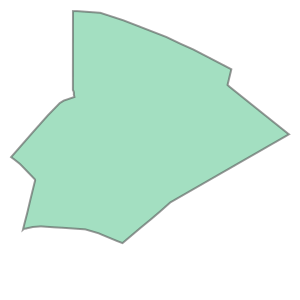

In [48]:
#a.columns
a.geometry[0]

In [33]:
# este sería nuestro shapefile, con la serie "geometria" almacenada como objeto de tipo texto. 
barrios_wkt = pd.read_csv('https://raw.githubusercontent.com/PyMap/datahouse/main/caba/barrios_wkt.csv')

In [38]:
barrios_wkt['str_geom'][0]

'POLYGON ((-58.4528200492791044 -34.5959886570638702, -58.4536551931370099 -34.5965557163040742, -58.4537674321646961 -34.5966342484151568, -58.4538163134147624 -34.5966684788921555, -58.4547947928050604 -34.5973527273643455, -58.4554840815947472 -34.5978347610251831, -58.4559204833295496 -34.5976953435828420, -58.4560093721284701 -34.5976669530231362, -58.4560576047802201 -34.5976515472867945, -58.4562363723256695 -34.5975900748434597, -58.4564940053845064 -34.5975015637739389, -58.4570733158433242 -34.5973024999732814, -58.4576142986162068 -34.5971165306990684, -58.4578298572665389 -34.5970394940223258, -58.4579314199406994 -34.5970031094654331, -58.4579383597537117 -34.5970006235553527, -58.4579391511879791 -34.5970004324802289, -58.4580314840711992 -34.5969781271248422, -58.4582467474022351 -34.5969261254882170, -58.4592081863103132 -34.5966936826244691, -58.4592753814056039 -34.5966774864903854, -58.4607717313583848 -34.5965908256842667, -58.4610084892409958 -34.5965771669178039, 

In [41]:
# vemos que la geometría se encuentra cargada como tipo object
barrios_wkt.str_geom.head()

0    POLYGON ((-58.4528200492791044 -34.59598865706...
1    POLYGON ((-58.4655768128540672 -34.59655770780...
2    POLYGON ((-58.4237529813036645 -34.59782733832...
3    POLYGON ((-58.4946097568899006 -34.61486523952...
4    POLYGON ((-58.4128700313088487 -34.61411625158...
Name: str_geom, dtype: object

In [42]:
# ahora, creamos una función para transformarla en geometría
def from_wkt(df, wkt_column, crs):
    '''
    Crea un geodataframe a partir de una columna de geometria de tipo object/string
    '''
    
    df["geometry"]= df[wkt_column].apply(wkt.loads) 
    gdf = gpd.GeoDataFrame(df, geometry='geometry',crs=crs) 
    
    return gdf

Antes de instanciar esta función en un un nuevo geodataframe, reparemos en que aún no conocemos el sistema de coordenadas de referencia. Algo indispensable si queremos ajustar un elipsoide a un plano. 

Para ello, revisemos antes [la siguiente documentación provista por el Instituto Geográfico Nacional](https://ramsac.ign.gob.ar/posgar07_pg_web/documentos/Informe_sobre_codigos_oficiales_EPSG.pdf).


In [43]:
# ... por ejemplo, POSGAR
from_wkt(barrios_wkt, 'str_geom', crs=5340).crs

<Geographic 2D CRS: EPSG:5340>
Name: POSGAR 2007
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Argentina - onshore and offshore.
- bounds: (-73.59, -58.41, -52.63, -21.78)
Datum: Posiciones Geodesicas Argentinas 2007
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
from_wkt(barrios_wkt, 'str_geom', crs=5340).crs.is_geographic

True

In [45]:
from_wkt(barrios_wkt, 'str_geom', crs=4326).crs.is_geographic

True

<td> <img src="https://drive.google.com/uc?id=1nm__KTmyByPLZwc7mmhdR1dCTN95bJU1" alt="Drawing" style="width: 500px;"/> </td>
</tr>


In [46]:
# tambien podríamos usar alguna de sus fajas. Esta corresponde a la faja 6!, un CRS proyectado en dos dimensiones
from_wkt(barrios_wkt, 'str_geom', crs=22196).crs.is_projected

True

También, podemos acceder al atributo ̣[datum](https://es.wikipedia.org/wiki/Datum) de la clase `crs` el que nos muestra la información relativa al marco de referencia. 

La Ciudad de Buenos Aires tiene su propio marco de referencia. Podemos utilizar un string con el formato [proj4](https://spatialreference.org/ref/sr-org/7124/proj4/) de la proyección [Gauss-Kruger BsAs](https://spatialreference.org/ref/sr-org/7124/) para definir el CRS

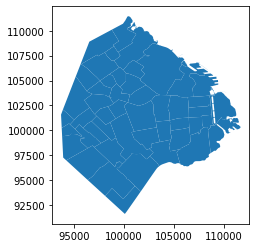

In [160]:
proj = '+proj=tmerc +lat_0=-34.6297166 +lon_0=-58.4627 +k=0.9999980000000001 +x_0=100000 +y_0=100000 +ellps=intl +units=m +no_defs'
bsas_gk = from_wkt(barrios_wkt, 'str_geom', crs=4326)
bsas_gk = bsas_gk.to_crs(proj).plot();
bsas_gk.plot();

In [52]:
bsas_gk.head()

,Unnamed: 0,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,str_geom,geometry
0,0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,POLYGON ((-58.4528200492791044 -34.59598865706...,"POLYGON ((-58.453 -34.596, -58.454 -34.597, -5..."
1,1,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO,POLYGON ((-58.4655768128540672 -34.59655770780...,"POLYGON ((-58.466 -34.597, -58.466 -34.597, -5..."
2,2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO,POLYGON ((-58.4237529813036645 -34.59782733832...,"POLYGON ((-58.424 -34.598, -58.425 -34.598, -5..."
3,3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO,POLYGON ((-58.4946097568899006 -34.61486523952...,"POLYGON ((-58.495 -34.615, -58.495 -34.615, -5..."
4,4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,POLYGON ((-58.4128700313088487 -34.61411625158...,"POLYGON ((-58.413 -34.614, -58.413 -34.615, -5..."


In [53]:
bsas_gk.crs.is_projected

True

In [54]:
bsas_gk.crs

<Projected CRS: +proj=tmerc +lat_0=-34.6297166 +lon_0=-58.4627 +k= ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: Unknown based on International 1924 (Hayford 1909, 1910) ellipsoid
- Ellipsoid: International 1924 (Hayford 1909, 1910)
- Prime Meridian: Greenwich

In [55]:
bsas_gk.crs.name

'unknown'

In [56]:
bsas_gk.crs.datum

DATUM["Unknown based on International 1924 (Hayford 1909, 1910) ellipsoid",
    ELLIPSOID["International 1924 (Hayford 1909, 1910)",6378388,297,
        LENGTHUNIT["metre",1,
            ID["EPSG",9001]]]]

In [57]:
print(bsas_gk.crs.to_epsg())

None


### Puntos, las estaciones de Ecobici ...

En el paso anterior, creamos un geodataframe cuya geoemtría principal eran polígonos. Ahora, vamos a hacer algo similar aunque con otro tipo de geometría. Vamos a levantar un geodataframe de puntos, con la ubicación de las estaciones EcoBici a partir de coordeandas x e y específicas.

In [58]:
# leemos el csv
estaciones = pd.read_csv('https://raw.githubusercontent.com/PyMap/datahouse/main/ecobici/nuevas-estaciones-bicicletas-publicas.csv')

In [59]:
estaciones.sample(4)

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
72,-34.605488,-58.364686,111 - MACACHA GUEMES,111,30,Machaca Guemes 350,Machaca Guemes,350.0,NaN,Puerto madero
79,-34.601173,-58.428509,121 - YATAY,121,20,925 Yatay& Humahuaca,Yatay& Humahuaca,925.0,Humahuaca,Almagro
60,-34.617448,-58.397602,091 - Pasco,91,20,708 Pasco & Chile,708 Pasco,708.0,Chile,Balvanera
114,-34.578048,-58.435247,182 - RAVIGNANI Y GUATEMALA,182,20,"2185 Ravignani, Emilio, Dr. & Guatemala","2185 Ravignani, Emilio, Dr.",2185.0,Guatemala,Palermo


In [60]:
from shapely.geometry import Point

In [61]:
list(zip(estaciones['long'], estaciones['lat']))

[(-58.3747151, -34.5924233),
 (-58.3682604, -34.611032),
 (-58.3687628, -34.6017255),
 (-58.4209542, -34.5805497),
 (-58.369758, -34.628526),
 (-58.381098, -34.606498),
 (-58.3893364, -34.6094218),
 (-58.407741, -34.585443),
 (-58.388807, -34.5927096),
 (-58.406, -34.61009),
 (-58.426387, -34.577424),
 (-58.4187306, -34.6064101),
 (-58.4417756, -34.5798619),
 (-58.406432, -34.640111),
 (-58.3825498, -34.5938629),
 (-58.379836, -34.600139),
 (-58.3808943, -34.610583),
 (-58.4161178, -34.5894269),
 (-58.3638723, -34.600752),
 (-58.3900887, -34.599068),
 (-58.4335573, -34.6079414),
 (-58.3973698, -34.5908211),
 (-58.3735984, -34.6072074),
 (-58.3989807, -34.5970909),
 (-58.371847, -34.5964246),
 (-58.3828403, -34.5970497),
 (-58.4076348, -34.6364511),
 (-58.3800307, -34.6046074),
 (-58.3900194, -34.583918),
 (-58.4138829, -34.5755148),
 (-58.3866934, -34.6018635),
 (-58.3743749, -34.6163012),
 (-58.362004, -34.623937),
 (-58.4010798, -34.5837348),
 (-58.3821261, -34.6014776),
 (-58.421984

In [62]:
def point_from_coord(df, x, y, crs):
  '''
  Carga un geodataframe de puntos a partir de un par de coordenadas lat/lon
  '''
  df['coordenadas'] = list(zip(df[x], df[y]))
  df['geometry'] = df['coordenadas'].map(Point)
  df_sin_coord = df.drop(columns=['coordenadas',x,y])
  gdf = gpd.GeoDataFrame(df_sin_coord, geometry='geometry', crs=crs) 

  return gdf

In [63]:
# creamos el gdf de estaciones
gdf = point_from_coord(estaciones, 'long', 'lat', 4326)

In [64]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

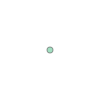

In [65]:
gdf.geometry.iloc[2]

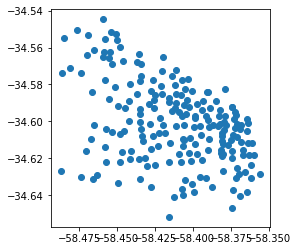

In [66]:
gdf.plot();

In [67]:
# acá, otra forma de crear un geodataframe de puntos a partir de un conjunto de coordenadas
gdf_test = gpd.GeoDataFrame(estaciones, crs=proj, 
                            geometry=gpd.points_from_xy(estaciones['long'], estaciones['lat']))

In [68]:
gdf_test.head(2)

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio,coordenadas,geometry
0,-34.592423,-58.374715,002 - Retiro I,2,20,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...","Ramos Mejia, Jose Maria, Dr. Av.",NaN,Del Libertador Av.,Retiro,"(-58.3747151, -34.5924233)",POINT (-58.375 -34.592)
1,-34.611032,-58.368260,003 - ADUANA,3,20,Moreno & Av Paseo Colon,Moreno,NaN,Av Paseo Colon,Monserrat,"(-58.3682604, -34.611032)",POINT (-58.368 -34.611)


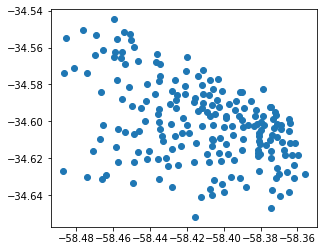

In [69]:
gdf_test.plot();

# Recapitulando, dos formas de visualizar

> **Eje único (superponiendo capas)**

In [70]:
barrios_proj = from_wkt(barrios_wkt, 'str_geom', crs=4326).to_crs(proj)
estaciones_proj = point_from_coord(estaciones, 'long', 'lat', 4326).to_crs(proj)

In [71]:
import matplotlib.pyplot as plt

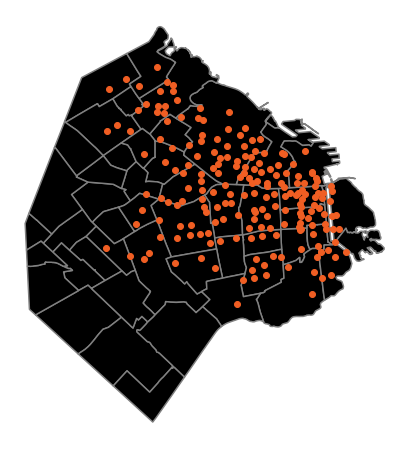

In [74]:
fig, ax = plt.subplots(figsize=(12,8))

barrios_proj.plot(ax=ax, color='black', edgecolor='grey', linewidth=1.5)

estaciones_proj.plot(ax=ax, color='#F05E23')
ax.set_axis_off();

In [75]:
estaciones.sample(3)

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio,coordenadas,geometry
85,-34.603369,-58.372763,132 - CORRIENTES,132,12,Reconquista & Corrientes Av.,Reconquista,NaN,Corrientes Av.,San nicolas,"(-58.372763, -34.6033685)",POINT (-58.372763 -34.6033685)
56,-34.594806,-58.409178,085 - AGUERO,85,20,"Aguero & Mansilla, Lucio Norberto, General",Aguero,NaN,"Mansilla, Lucio Norberto, General",Recoleta,"(-58.4091784, -34.5948057)",POINT (-58.4091784 -34.5948057)
124,-34.627535,-58.365721,196 - HOSPITAL ARGERICH,196,20,750 Pi Y Margall & Necochea,750 Pi Y Margall,750.0,Necochea,Boca,"(-58.3657211, -34.6275351)",POINT (-58.3657211 -34.6275351)


In [76]:
df = pd.read_csv('https://storage.googleapis.com/python_mdg/data_cursos/bici18_cdn.csv')

In [77]:
df.sample(3)

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
1102733,388272.0,2018-09-05 13:24:51,21.0,Urquiza,41,Constitucion II,148.0,MASCULINO,33.0
1418277,531464.0,2018-08-09 20:50:19,26.0,Posadas,189,Hospital Rivadavia,50.0,FEMENINO,22.0
281092,563070.0,2018-11-16 15:23:48,15.0,Carlos Calvo,93,Esmeralda y Corrientes,175.0,MASCULINO,25.0


In [78]:
len(df)

2970479

In [79]:
# Creamos la cantidad total de retiros en origen para el año 2018
retiros_en_origen = df.groupby(['bici_nombre_estacion_origen',
                                'bici_estacion_origen'])[['bici_sexo']].count().reset_index()

In [80]:
retiros_en_origen

,bici_nombre_estacion_origen,bici_estacion_origen,bici_sexo
0,15 de Noviembre,105,4966
1,25 de Mayo,60,11750
2,9 de Julio,112,8363
3,Acevedo,136,16853
4,Acuña de Figueroa,54,24843
...,...,...,...
196,Vera Peñaloza,150,26708
197,Villarroel,158,8722
198,Virrey Cevallos,183,25584
199,Virrey Liniers,139,8544


In [81]:
# ... y lo mergeamos con nuestro shape de estaciones
retiros_en_origen_map = pd.merge(estaciones_proj,retiros_en_origen, 
                                 left_on='id_estacion', 
                                 right_on='bici_estacion_origen')

In [82]:
retiros_en_origen_map.head()

,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio,geometry,bici_nombre_estacion_origen,bici_estacion_origen,bici_sexo
0,002 - Retiro I,2,20,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...","Ramos Mejia, Jose Maria, Dr. Av.",NaN,Del Libertador Av.,Retiro,POINT (108071.943 104133.650),Retiro,2,17426
1,003 - ADUANA,3,20,Moreno & Av Paseo Colon,Moreno,NaN,Av Paseo Colon,Monserrat,POINT (108662.180 102068.743),Aduana,3,6756
2,004 - Plaza Roma,4,20,Lavalle & Bouchard,Lavalle,NaN,Bouchard,San nicolas,POINT (108617.061 103101.211),Plaza Roma,4,14935
3,005 - Plaza Italia,5,42,Av. Sarmiento 2601,Av. Sarmiento,2601.0,NaN,Palermo,POINT (103830.403 105453.581),Plaza Italia,5,35698
4,006 - Parque Lezama,6,20,"Avenida Martin Garcia, 295","Avenida Martin Garcia,",295.0,NaN,San telmo,POINT (108523.029 100128.153),Parque Lezama,6,15010


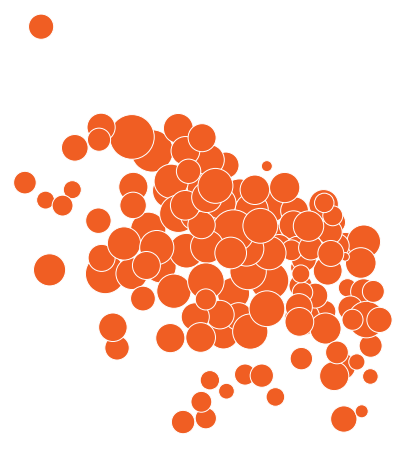

In [85]:
# un primer pantallazo de nuestras estaciones
fig, ax =plt.subplots(figsize=(15,8))
retiros_en_origen_map.plot(ax=ax, 
                           markersize=retiros_en_origen_map['bici_sexo']*0.05, 
                           color='#F05E23', edgecolor='white')
ax.set_axis_off();

> **Ejes múltiples (mapas comparativos)**

Este es el caso de los ejes múltiples. Un recurso bastante útil a la hora de armar mapas comaprativos, como una misma choropleta con distintos esquemas de claseficación. O bien la cantidad de retiros de bicicletas en momentos o ubicaciones diferentes

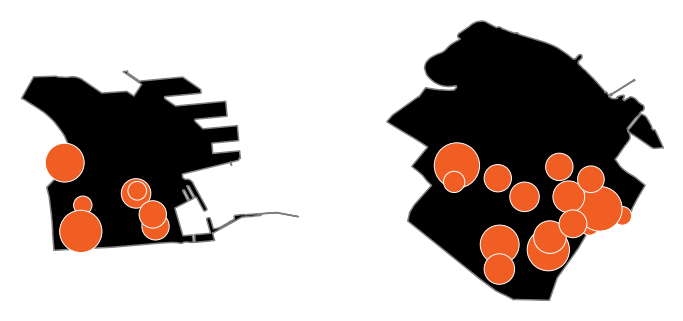

In [86]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# barrio 1
barrios_proj.loc[barrios_proj['BARRIO']=='RETIRO'].plot(ax=ax1, color='black', 
                                                        edgecolor='grey', linewidth=1.5)
retiros_en_origen_map.loc[retiros_en_origen_map['barrio']=='Retiro'].plot(ax=ax1, 
                                                                          markersize=retiros_en_origen_map['bici_sexo']*0.05, 
                                                                          color='#F05E23', edgecolor='white')

#barrio 2
barrios_proj.loc[barrios_proj['BARRIO']=='PALERMO'].plot(ax=ax2, color='black', 
                                                         edgecolor='grey', linewidth=1.5)
retiros_en_origen_map.loc[retiros_en_origen_map['barrio']=='Palermo'].plot(ax=ax2, 
                                                                           markersize=retiros_en_origen_map['bici_sexo']*0.05, 
                                                                           color='#F05E23', edgecolor='white')

ax1.set_axis_off()
ax2.set_axis_off();

# Operaciones geográficas para el estudio del transporte público de bicicletas

El análisis espacial, muchas veces nos demanda realizar distintos tipos de manipulaciones sobre geometrías u objetos espaciales. Por ejemplo, podríamos necesitar recortar una capa en función de otra base, agregar etiquetas provenientes de capas de superposición, ver delimitaciones establecidas entre dos o más capas que intersectan, etc, etc.

Esto, con la finalidad de de responder preguntas específicas. Por ejemplo, imaginemos que necesitamos conocer la cantidad de retiros de bicicletas a un nivel de agregación mayor. Digamos, comunas.

> **join espacial**

GeoPandas permie, así como Pandas, realizar joins según columnas, a través de **merge** o **join**. Además, GeoPandas agrega la posibilidad de unir dos GeoDataFrames según una operación espacial. El método a emplear es **.sjoin** que tiene dos parámetros importantes: 

- how: que permite establecer si es un *left*, un *right* o un *inner*.

- predicate: consta de 3 operaciones geográficas:

    **intersects (interseca)**: los atributos se van a joinear si el límite o el interior de un objeto (geográfico) se interseca con el límite o el interior del otro objeto geográfico.
    
    **within (dentro)**: los atributos se van a joinear si el límite o el interior de un objeto (geográfico) se interseca sólo con el interior del otro objeto geográfico.

    **contains (contiene)**: los atributos se van a joinear si el interior del objeto contiene la frontera y el interior del otro objeto y sus límites no se tocan.


Puede consultarse la documentación en: http://geopandas.org/mergingdata.html

In [87]:
comunas = gpd.read_file('/drive/MyDrive/Gestion de ciudades/data/comunas.zip')

In [88]:
# Primero veamos en qué coordenadas están las capas que queremos unir
comunas.crs == retiros_en_origen_map.crs

False

In [89]:
# Es el mismo? podemos realizar la operación con tranquilidad?
retiros_comuna = gpd.sjoin(retiros_en_origen_map, comunas, how='left', predicate='within')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +proj=tmerc +lat_0=-34.6297166 +lon_0=-58.4627 +k= ...
Right CRS: PROJCS["Argentina_GKBsAs",GEOGCS["Campo Inchauspe" ...

  


In [90]:
# reproyectemos!
retiros_comuna = gpd.sjoin(retiros_en_origen_map, comunas.to_crs(proj), how='left', predicate='within')

In [93]:
retiros_comuna.head()

,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio,geometry,bici_nombre_estacion_origen,bici_estacion_origen,bici_sexo,index_right,BARRIOS,PERIMETRO,AREA,COMUNAS,ID,OBJETO
0,002 - Retiro I,2,20,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...","Ramos Mejia, Jose Maria, Dr. Av.",NaN,Del Libertador Av.,Retiro,POINT (108071.943 104133.650),Retiro,2,17426,13,CONSTITUCION - MONSERRAT - PUERTO MADERO - RE...,36102.201573,1.779457e+07,1.0,14,LIMITE COMUNAL
1,003 - ADUANA,3,20,Moreno & Av Paseo Colon,Moreno,NaN,Av Paseo Colon,Monserrat,POINT (108662.180 102068.743),Aduana,3,6756,13,CONSTITUCION - MONSERRAT - PUERTO MADERO - RE...,36102.201573,1.779457e+07,1.0,14,LIMITE COMUNAL
2,004 - Plaza Roma,4,20,Lavalle & Bouchard,Lavalle,NaN,Bouchard,San nicolas,POINT (108617.061 103101.211),Plaza Roma,4,14935,13,CONSTITUCION - MONSERRAT - PUERTO MADERO - RE...,36102.201573,1.779457e+07,1.0,14,LIMITE COMUNAL
3,005 - Plaza Italia,5,42,Av. Sarmiento 2601,Av. Sarmiento,2601.0,NaN,Palermo,POINT (103830.403 105453.581),Plaza Italia,5,35698,8,PALERMO,22126.531858,1.584587e+07,14.0,9,LIMITE COMUNAL
4,006 - Parque Lezama,6,20,"Avenida Martin Garcia, 295","Avenida Martin Garcia,",295.0,NaN,San telmo,POINT (108523.029 100128.153),Parque Lezama,6,15010,13,CONSTITUCION - MONSERRAT - PUERTO MADERO - RE...,36102.201573,1.779457e+07,1.0,14,LIMITE COMUNAL


Esta operación nos permitiría comparar tanto la cantidad de retiros entre polígonos (puntos graduados) como dentro de los mismos (choropletas). Veamos el primer caso ...

In [94]:
def compara_retiros_totales(comuna_a, comuna_b):
  '''
  Compara cantidad de retiros totales en estaciones de origen
  ...
  Argumentos:
    comuna_a (int): id de la primera comuna
    comuna_b (int): id de la segunda comuna 
  Devuelve
  
  '''
  fig = plt.figure(figsize=(15,8))
  ax1 = fig.add_subplot(1,2,1)
  ax2 = fig.add_subplot(1,2,2)

  # comuna a
  comunas.loc[comunas.COMUNAS == comuna_a].plot(ax=ax1, color='black', edgecolor='grey', linewidth=1.5)
  retiros_comuna.loc[retiros_comuna.COMUNAS == comuna_a].plot(ax=ax1, color='red', 
                                                         edgecolor='white',
                                                         markersize=retiros_comuna['bici_sexo']*0.05).plot()

  # comuna b
  comunas.loc[comunas.COMUNAS == comuna_b].plot(ax=ax2, color='black', edgecolor='grey', linewidth=1.5)
  retiros_comuna.loc[retiros_comuna.COMUNAS == comuna_b].plot(ax=ax2, color='green', 
                                                         edgecolor='white', 
                                                         markersize=retiros_comuna['bici_sexo']*0.05).plot()

  ax1.set_title('Retiros en origen:Comuna {}'.format(comuna_a))
  ax1.set_axis_off()

  ax2.set_title('Retiros en origen:Comuna {}'.format(comuna_b))
  ax2.set_axis_off();

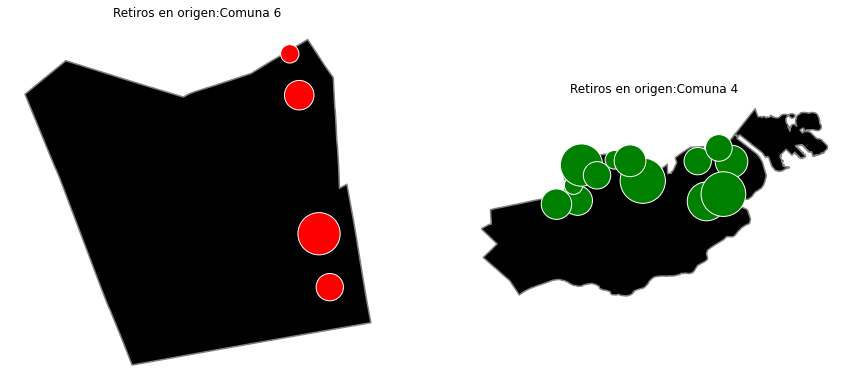

In [99]:
compara_retiros_totales(6, 4)

In [100]:
comunas_agregacion = retiros_comuna.groupby(['COMUNAS'])[['bici_sexo']].sum().reset_index()
retiros_por_comuna = pd.merge(comunas, comunas_agregacion[['COMUNAS','bici_sexo']], 
                              how='left', on='COMUNAS')

In [102]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
retiros_por_comuna.fillna(0, inplace=True)

In [104]:
# retiros anuales totales por comuna
retiros_por_comuna.head()

,BARRIOS,PERIMETRO,AREA,COMUNAS,ID,OBJETO,geometry,bici_sexo
0,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,"POLYGON ((107643.458 106569.299, 107641.492 10...",375303.0
1,ALMAGRO - BOEDO,12323.432479,6.660603e+06,5.0,2,LIMITE COMUNAL,"POLYGON ((104625.143 101679.935, 104629.994 10...",154197.0
2,CABALLITO,10990.964471,6.851029e+06,6.0,3,LIMITE COMUNAL,"POLYGON ((102998.760 102464.802, 103002.947 10...",74271.0
3,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07,7.0,4,LIMITE COMUNAL,"POLYGON ((101036.604 99947.208, 101075.002 998...",0.0
4,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,9.0,5,LIMITE COMUNAL,"POLYGON ((94869.346 99583.645, 94885.072 99583...",0.0


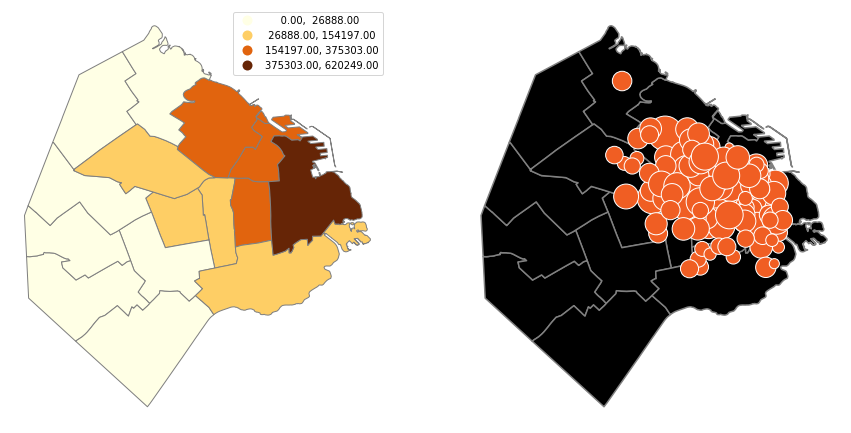

In [109]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

retiros_por_comuna.plot(ax=ax1, column='bici_sexo', 
                        cmap='YlOrBr', edgecolor='grey', 
                        scheme='NaturalBreaks', k=4, legend=True)

comunas.plot(ax=ax2, color='black', edgecolor='grey', linewidth=1.5)
retiros_en_origen_map.plot(ax=ax2,  
                           markersize=retiros_en_origen_map['bici_sexo']*0.03, 
                           color='#F05E23',
                           #column='bici_sexo', legend=True, 
                           edgecolor='white')

ax1.set_axis_off()
ax2.set_axis_off();

Los que quieran ahondar un poco más sobre esquemas de clasificación, acá compartimos el link al siguiente [material complementario](https://github.com/PyMap/MDG/blob/master/Clase%203/03_2_esquemas_clasificacion.ipynb)

> **Operaciones geográficas: overlay y dissolve**

Otra pregunta que podríamos llegar a querer respondernos es cuál es el área de cobertura del servicio. Supongamos que para poder hacerlo, establecemos como parámetro un buffer de cierta distancia a las estaciones de ecobici. Así, podremos determinar un patrón de cobertura. Esto, combinando los radios de cobertura que se intersectan y determinando el área de la geometría resultante. Para ello, nos valdremos de dos operaciones comunmente utilizadas, el overlay y el dissolve. Dos métodos que se encuentran implementados en geopandas de una manera bastante clara. 

In [136]:
estaciones_buff = estaciones_proj.copy()
estaciones_buff.geometry = estaciones_buff.buffer(1500) # dado que las estaciones se encuentran bastante concentradas, definamos un buffer de corto alcance

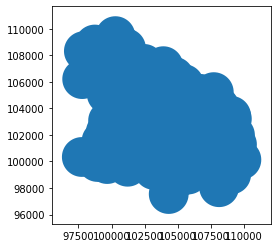

In [137]:
estaciones_buff.plot();

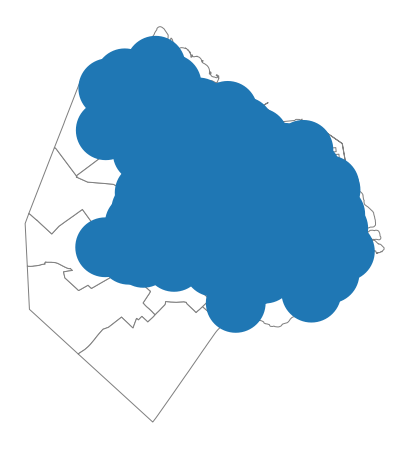

In [138]:
fig, ax = plt.subplots(figsize=(15,8))

comunas.plot(ax=ax, color='white', edgecolor='grey', linewidth=1)
estaciones_buff.plot(ax=ax)

ax.set_axis_off();

Ahora vamos a ver cómo calcular el área cubierta y el área no cubierta. El área cubierta es la **intersección** entre la capa de barrios y la capa de estaciones (con su buffer). Por otro lado, el área no cubierta es la **diferencia** entre la capa de barrios y la capa de estaciones (con su buffer).

In [139]:
interseccion = gpd.overlay(estaciones_buff, comunas.to_crs(proj), how = "intersection")

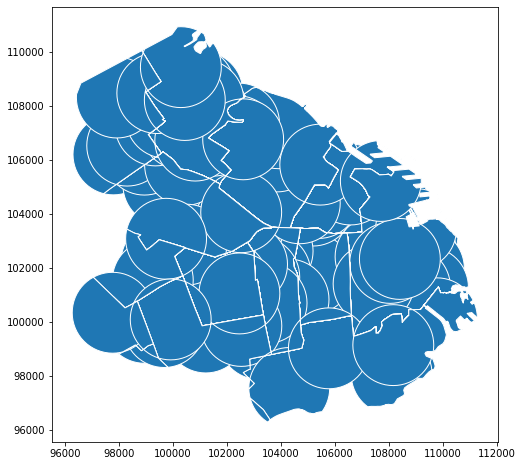

In [140]:
interseccion.plot(figsize=(15,8), edgecolor='white');

In [141]:
len(interseccion)

652

In [142]:
# ahora, podemos ver el área de intersección entre buffers
interseccion.geometry.area

0      7.793771e+05
1      6.146163e+04
2      3.518775e+05
3      4.598860e+05
4      2.924138e+06
           ...     
647    1.223929e+06
648    2.517434e+05
649    5.124859e+06
650    8.032276e+05
651    1.847012e+05
Length: 652, dtype: float64

Sin embargo, como podemos verlos buffer se superponen, lo que nos estaría haciendo incurrir en el error de contar más de una vez áreas de cobertura. Por eso, debemos primer unir todos los polígonos para evitar errores de duplicación.

Acá es donde entra el método `dissolve`. Este método unifica geometrías bajo una constante. Primero, vamos a generar un agrupamiento para calcular el área de cobertura en toda la Ciudad. Lógicamente, esta lógica se podría replicar para grupos de comunas, haciendo el filtrado correspondiente.

In [143]:
# creamos una constante
interseccion["const"] = 0

In [144]:
interseccion.head()

,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio,BARRIOS,PERIMETRO,AREA,COMUNAS,ID,OBJETO,geometry,const
0,002 - Retiro I,2,20,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...","Ramos Mejia, Jose Maria, Dr. Av.",NaN,Del Libertador Av.,Retiro,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,"MULTIPOLYGON (((107636.516 105569.061, 107779....",0
1,005 - Plaza Italia,5,42,Av. Sarmiento 2601,Av. Sarmiento,2601.0,NaN,Palermo,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,"POLYGON ((105265.813 105018.154, 105216.222 10...",0
2,007 - OBELISCO,7,16,CARLOS PELEGRINI 215,CARLOS PELEGRINI,215.0,NaN,San nicolas,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,"POLYGON ((106162.216 103279.849, 106237.893 10...",0
3,008 - Congreso,8,24,"Cevallos, Virrey& Yrigoyen, Hipolito Av.","Cevallos, Virrey& Yrigoyen, Hipolito Av.",NaN,"Yrigoyen, Hipolito Av.",San nicolas,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,"POLYGON ((105668.519 103309.640, 105777.589 10...",0
4,009 - Parque Las Heras,9,24,"2300 Diaz, Cnel. Av. & French","2300 Diaz, Cnel. Av.",2300.0,French,Palermo,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,"POLYGON ((106535.267 104763.134, 106513.668 10...",0


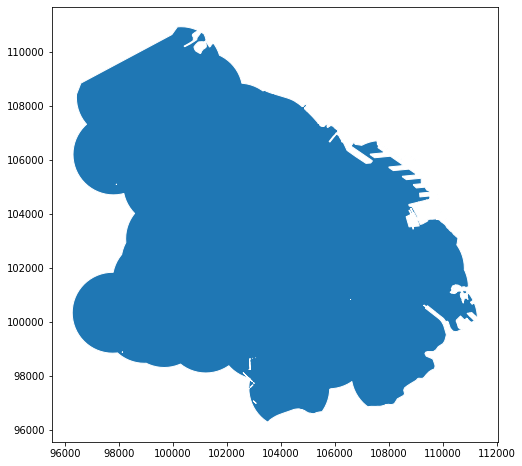

In [145]:
interseccion.dissolve(by="const").plot(figsize=(15,8), edgecolor='white'); 

In [146]:
area_de_cobertura = interseccion.dissolve(by="const")

In [147]:
# vemos que es una sola geometría
len(area_de_cobertura)

1

In [148]:
# de tipo multipolígono
area_de_cobertura.geometry

const
0    MULTIPOLYGON (((98504.510 98524.214, 98365.912...
Name: geometry, dtype: geometry

In [149]:
area_de_cobertura

,geometry,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio,BARRIOS,PERIMETRO,AREA,COMUNAS,ID,OBJETO
const,,,,,,,,,,,,,,,
0,"MULTIPOLYGON (((98504.510 98524.214, 98365.912...",002 - Retiro I,2,20,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...","Ramos Mejia, Jose Maria, Dr. Av.",2601.0,Del Libertador Av.,Retiro,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL


In [150]:
area_de_cobertura.geometry.area.values[0]

138234219.71772787

In [151]:
km2_cobertura = area_de_cobertura.geometry.area.values[0]/1000000
print("El área cubierta dentro de un buffer de 300 metros es de %r km2"%km2_cobertura)

El área cubierta dentro de un buffer de 300 metros es de 138.23421971772788 km2


In [152]:
porcentaje_cub = round(area_de_cobertura.geometry.area/comunas.geometry.area.sum()*100,2).values[0]
print("Lo que representa un total del {}% respecto del área total de la ciudad".format(porcentaje_cub))

Lo que representa un total del 67.74% respecto del área total de la ciudad


También podríamos haber calculado el área no cubierta dentro de un buffer de 300mts a las estaciones de EcoBici. Para eso, la operación a ser utilizada hubiese sido `difference` en lugar de `intersect`.

In [153]:
diferencia = gpd.overlay(comunas.to_crs(proj), estaciones_buff, how = "difference")

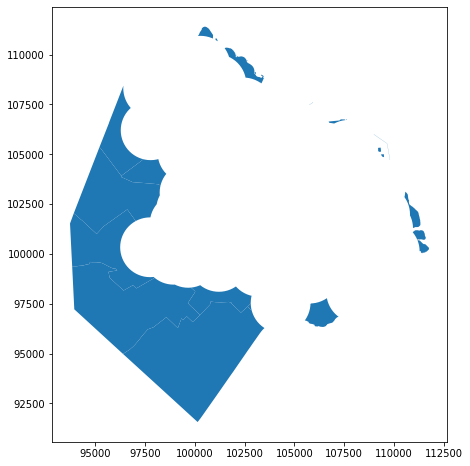

In [154]:
# aca vemos el area no cubierta
diferencia.plot(figsize=(12,8));

In [155]:
diferencia["const"] = 0
area_no_cubierta = diferencia.dissolve(by='const')

In [157]:
km2_no_cubierta = area_no_cubierta.geometry.area.values[0]/1000000
print("El área cubierta dentro de un buffer de 1500 metros es de %r km2"%km2_no_cubierta)

El área cubierta dentro de un buffer de 1500 metros es de 65.83449731289816 km2


In [158]:
porcentaje_des = round(area_no_cubierta.geometry.area/comunas.geometry.area.sum()*100,2).values[0]
print("Lo que representa un total del {}% respecto del área total de la ciudad".format(porcentaje_des))

Lo que representa un total del 32.26% respecto del área total de la ciudad


In [159]:
# el area de la ciudad
porcentaje_cub + porcentaje_des

100.0